In [16]:
import random
import sys
import numpy as np
import requests
from boptestGymEnv import BoptestGymEnv

In [17]:
seed = 123456
random.seed(seed)
np.random.seed(seed)

In [18]:
url = 'https://api.boptest.net'

In [1]:
try:
  !rm -rf boptestGymService
except:
  pass
!git clone -b boptest-gym-service https://github.com/ibpsa/project1-boptest-gym.git boptestGymService

Cloning into 'boptestGymService'...
remote: Enumerating objects: 3938, done.
remote: Counting objects: 100% (492/492), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 3938 (delta 294), reused 441 (delta 267), pack-reused 3446 (from 1)
Receiving objects: 100% (3938/3938), 49.15 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (2088/2088), done.


/Users/hanskrio/opt/miniconda3/envs/boptestgym/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


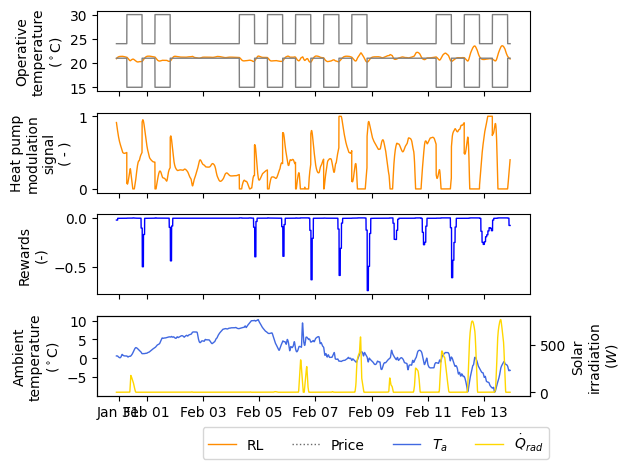

KPIs for the baseline controller:
tdis_tot: 10.518481491630794
idis_tot: 0
ener_tot: 3.569970987031343
cost_tot: 0.9049876452124441
emis_tot: 0.5961851548342336
pele_tot: 0.018853385753559982
pgas_tot: None
pdih_tot: None
time_rat: 0.0004343239547403693


In [23]:
# Insert the path to boptestGymService if it's not already in your Python path
sys.path.insert(0, 'boptestGymService')

# Define the periods to exclude (winter period)
excluding_periods = [(79 * 24 * 3600, 355 * 24 * 3600)]

# Temperature setpoints in Kelvin
lower_setp = 21 + 273.15
upper_setp = 24 + 273.15

# Instantiate the environment
env_baseline = BoptestGymEnv(
    url=url, 
    testcase='bestest_hydronic_heat_pump',
    actions=['oveHeaPumY_u'],  # We'll set this to empty later
    observations={'reaTZon_y': (lower_setp, upper_setp)},
    random_start_time=True,
    excluding_periods=excluding_periods,
    max_episode_length=14 * 24 * 3600,  # 14 days
    warmup_period=24 * 3600,           # 1 day
    step_period=3600,                  # 1 hour
    render_episodes=True
)

# Set actions to an empty list to use the baseline controller
env_baseline.actions = []

# Reset the environment to start a new episode
obs = env_baseline.reset()

done = False
observations = []
actions = []
rewards = []

# Run the baseline controller over one episode
while not done:
    action = []
    # Adjusted line to unpack five values
    obs, reward, terminated, truncated, info = env_baseline.step(action)
    done = (terminated or truncated)
    observations.append(obs)
    actions.append(action)
    rewards.append(reward)

# After the episode, collect the KPIs
kpis_baseline = env_baseline.get_kpis()

# Print the KPIs for the baseline controller
print("KPIs for the baseline controller:")
for kpi, value in kpis_baseline.items():
    print(f"{kpi}: {value}")